In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm

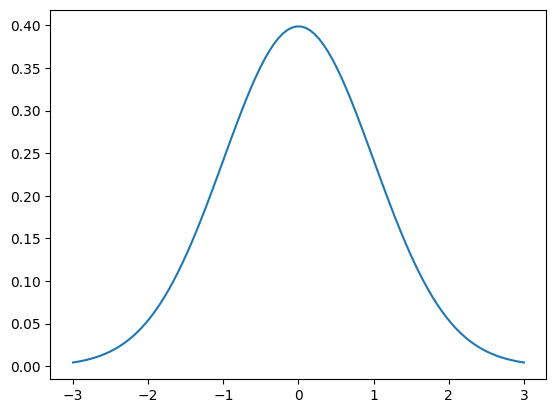

In [44]:
# normal curve
xs = np.linspace(-3, 3, 100)
ys = stats.norm.pdf(xs)
_, axe = plt.subplots()

axe.plot(xs, ys)

#### 평균값 비교 : ttest_ind (2 groups)
### - 조건
* normal distribution에서 추출한 샘플일 것. : shapiro
* 각 그룹별 편차가 동일할 것. : levene


In [45]:
filename = "산업_규모별_임금_및_근로시간_20230315211213.csv"

pd_data = pd.read_csv(filename, encoding='cp949')
np_data = pd_data.to_numpy()

np_data = np_data[:,2:]
print(np_data)

# C.제조업(10~34) F.건설업(41~42) G.도매 및 소매업(45~47) J.정보통신업(58~63) K.금융 및 보험업(64~66) 순서

[[2020.01 168.3 136.6 160.2 159.2 157.8]
 [2020.02 169.8 132.0 159.9 160.3 158.4]
 [2020.03 185.0 144.3 170.8 174.6 173.2]
 [2020.04 169.9 136.1 159.2 159.1 157.7]
 [2020.05 157.4 130.3 154.6 150.6 149.3]
 [2020.06 177.7 143.3 171.3 174.2 172.5]
 [2020.07 184.2 145.5 177.3 179.3 178.7]
 [2020.08 160.3 132.6 158.2 156.9 153.9]
 [2020.09 176.4 137.5 166.0 165.3 164.0]
 [2020.1 163.4 127.8 152.7 150.1 148.6]
 [2020.11 178.0 136.5 165.2 166.3 162.5]
 [2020.12 181.8 140.8 170.5 169.1 168.7]
 [2021.01 170.8 135.5 160.5 160.0 158.5]
 [2021.02 154.0 121.3 146.0 145.2 144.2]
 [2021.03 183.6 140.7 171.4 172.8 173.0]
 [2021.04 183.9 141.2 172.0 174.3 173.2]
 [2021.05 164.8 129.3 155.2 151.7 149.4]
 [2021.06 183.9 142.1 171.9 173.6 171.6]
 [2021.07 182.1 140.5 171.4 173.1 170.7]
 [2021.08 166.5 136.0 163.5 165.4 161.1]
 [2021.09 159.8 127.8 152.2 150.9 147.8]
 [2021.1 164.0 128.8 154.4 150.8 147.2]
 [2021.11 183.1 141.7 171.2 173.7 170.3]
 [2021.12 186.0 145.5 175.8 176.6 176.1]
 [2022.01 169.1 13

In [46]:
# 2022년 제조, 정보통신 평균 근로시간 비교

# by slicing
data_2022 = np_data[-12:, :]

# by filter
filter1 = (2022 <= np_data[:,0]) & (np_data[:,0] < 2023)
data_2022 = np_data[filter1]


print(data_2022)

manuf_2022 = data_2022[:,1].astype(np.float64)
ict_2022 = data_2022[:,-2].astype(np.float64)


print(manuf_2022)
print(ict_2022)

[[2022.01 169.1 135.3 159.9 160.1 156.5]
 [2022.02 151.8 118.9 145.1 143.8 140.9]
 [2022.03 174.0 135.6 164.4 164.6 161.0]
 [2022.04 175.8 137.4 166.4 166.8 163.9]
 [2022.05 175.0 136.5 165.2 166.0 163.3]
 [2022.06 169.9 135.0 159.5 159.2 156.6]
 [2022.07 174.5 136.5 164.9 166.2 162.7]
 [2022.08 169.7 138.6 168.3 170.9 167.9]
 [2022.09 166.0 131.1 157.8 158.2 156.2]
 [2022.1 164.1 128.7 154.0 152.1 148.6]
 [2022.11 182.8 139.0 171.7 173.9 171.3]
 [2022.12 180.2 139.1 170.5 169.4 169.0]]
[169.1 151.8 174.  175.8 175.  169.9 174.5 169.7 166.  164.1 182.8 180.2]
[160.1 143.8 164.6 166.8 166.  159.2 166.2 170.9 158.2 152.1 173.9 169.4]


In [47]:
# normal distribution?
stats.shapiro(manuf_2022)

# 유의수준 : 5%
# 귀무가설 : normal (샘플은 정규분포 집단에서 추출됨)
# p_value가 0.05보다 크다! -> 귀무가설 수용 ---> manuf_2022 값은 normal distribution을 따른다!

stats.shapiro(ict_2022) # 귀무가설 수용

ShapiroResult(statistic=0.9346754550933838, pvalue=0.43231019377708435)

In [48]:
# 분산?
stats.levene(manuf_2022, ict_2022)

# 귀무가설 : 두개 그룹의 분산이 같다
# pvalue > 0.05, 귀무가설 수용

LeveneResult(statistic=0.01562407603446479, pvalue=0.9016616337948137)

In [50]:
# 평균 비교
stats.ttest_ind(manuf_2022, ict_2022)

# 귀무가설: 두개 그룹의 평균값은 같다
# pvalue < 0.05, 귀무가설 기각 -> 두개 그롭의 평균값은 다른다
print(np.mean(manuf_2022))
print(np.mean(ict_2022))

171.07499999999996
162.6
